```markdown
### `random_noise` 函数说明

```python
def random_noise(image, mode='gaussian', seed=None, clip=True, **kwargs):
```

#### 功能
为浮点型图片添加各种随机噪声。

#### 参数

- `image`: 输入图片 (将会被转换成浮点型) `ndarray`型
- `mode`: 可选择`str`型表示要添加的噪声类型
    - `gaussian`: 高斯噪声
    - `localvar`: 高斯分布的加性噪声在“图像”的每个点处具有指定的局部方差。
    - `poisson`: 泊松噪声
    - `salt`: 盐噪声随机将像素值变成1
    - `pepper`: 椒噪声随机将像素值变成0或-1取决于矩阵的值是否带符号
    - `s&p`: 椒盐噪声
    - `speckle`: 均匀噪声 (均值mean方差variance) out=image+n*image
- `seed`: 可选的`int`型如果选择的话在生成噪声前会先设置随机种子以避免伪随机
- `clip`: 可选的`bool`型如果是True在添加均值泊松以及高斯噪声后会将图片的数据裁剪到合适范围内。如果是False则输出矩阵的值可能会超出[-1,1]
- `sigma`: 可选的`float`型, 定义高斯噪声的标准差。默认值为0.1。
- `mean`: 可选的`float`型高斯噪声和均值噪声中的mean参数默认值=0
- `var`: 可选的`float`型高斯噪声和均值噪声中的方差默认值=0.01 (注: 不是标准差)
- `local_vars`: 可选的`ndarray`型用于定义每个像素点的局部方差在localvar中使用
- `amount`: 可选的`float`型是椒盐噪声所占比例默认值=0.05
- `salt_vs_pepper`: 可选的`float`型椒盐噪声中椒盐比例值越大表示盐噪声越多默认值=0.5即椒盐等量
- `n_bins`: 可选的`int`型用于定义泊松噪声的直方图箱数默认值=256

#### 返回值
ndarry型且值在[0,1]或者[-1,1]之间取决于是否是有符号数
```

In [1]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from skimage.util import random_noise

In [2]:
# 读取图片
img = cv2.imread("lenna.png")

# 添加噪声
noise_img = random_noise(img, mode='poisson', clip=True)

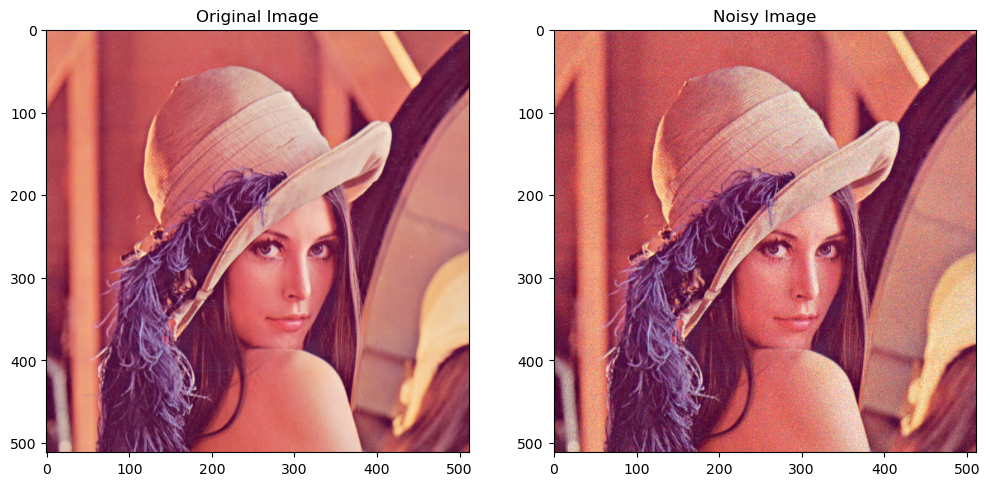

'\ncv2.imshow("source", img)\ncv2.imshow("lenna", noise_img)\ncv2.waitKey(0)\ncv2.destroyAllWindows()\n'

In [4]:
# 图像显示
# 将BGR图像转换为RGB图像
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
noise_img_rgb = cv2.cvtColor((noise_img * 255).astype(np.uint8), cv2.COLOR_BGR2RGB)

fig = plt.figure(figsize=(12, 6))  # 调整图像大小
ax1 = fig.add_subplot(1, 2, 1)
ax1.imshow(img_rgb)  # 显示RGB图像
ax1.set_title('Original Image')

ax2 = fig.add_subplot(1, 2, 2)
ax2.imshow(noise_img_rgb)  # 显示RGB图像
ax2.set_title('Noisy Image')

plt.show()

"""
cv2.imshow("source", img)
cv2.imshow("lenna", noise_img)
cv2.waitKey(0)
cv2.destroyAllWindows()
"""

# 保存图片
#cv.imwrite('lenna_noise.png',noise_gs_img)